In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Dense, LSTM, Bidirectional
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler


In [2]:
# from tf.keras.models import Sequential 
# This does not work!

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

ImportError: Module use of python37.dll conflicts with this version of Python.

In [5]:
 # 학습 데이터를 생성한다.
 # ex: data = [1,2,3,4,5,6,7,8,9,10]가 주어졌을 때 generateX(data, 5)를 실행하면
 # 아래와 같은 학습데이터 변환한다.
 #
 # x                      y
 # ---------              -
 # 1,2,3,4,5              6
 # 2,3,4,5,6              7
 # 3,4,5,6,7              8
 # ...

In [7]:
def generateX(a, n):
    x_train = []
    y_train = []
    for i in range(len(a)):
        x = a[i:(i + n)]
        if (i + n) < len(a):
            x_train.append(x)
            y_train.append(a[i + n])
        else:
            break
    return np.array(x_train), np.array(y_train)




In [9]:
 # Sine 함수에 노이즈를 섞은 데이터로 학습 데이터 100개를 생성한다
data = np.sin(2 * np.pi * 0.03 * np.arange(0, 100)) + np.random.random(100)
x, y = generateX(data, 10)
x = x.reshape(-1,10,1)
y = y.reshape(-1,1)


In [15]:
# 학습용 데이터와 시험용 데이터
x_train = x[:70, :, :]
y_train = y[:70:, :]
x_test = x[70:, :, :]
y_test = y[70:, :]


In [19]:
# 2층-양방항 구조의 LSTM 모델을 생성한다.
K.clear_session()     # 모델 생성전에 tensorflow의 graph 영역을 clear한다.

xInput = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))
xLstm_1 = LSTM(10, return_sequences = True)(xInput)
xLstm_2 = Bidirectional(LSTM(10))(xLstm_1)
xOutput = Dense(1)(xLstm_2)


model = Model(xInput, xOutput)
model.compile(loss='mse', optimizer='adam')


In [22]:
# 학습
model.fit(x_train, y_train, epochs=500, batch_size=20,verbose=1)


Epoch 1/500
70/70 [==============================] - 2s 26ms/step - loss: 1.0347
Epoch 2/500
70/70 [==============================] - 0s 527us/step - loss: 0.9769
Epoch 3/500
70/70 [==============================] - 0s 556us/step - loss: 0.9204
Epoch 4/500
70/70 [==============================] - 0s 598us/step - loss: 0.8740
Epoch 5/500
70/70 [==============================] - 0s 613us/step - loss: 0.8230
Epoch 6/500
70/70 [==============================] - 0s 684us/step - loss: 0.7763
Epoch 7/500
70/70 [==============================] - 0s 598us/step - loss: 0.7357
Epoch 8/500
70/70 [==============================] - 0s 598us/step - loss: 0.6997
Epoch 9/500
70/70 [==============================] - 0s 598us/step - loss: 0.6678
Epoch 10/500
70/70 [==============================] - 0s 598us/step - loss: 0.6441
Epoch 11/500
70/70 [==============================] - 0s 584us/step - loss: 0.6280
Epoch 12/500
70/70 [==============================] - 0s 598us/step - loss: 0.6156
Epoch 13/500
7

70/70 [==============================] - 0s 470us/step - loss: 0.0818
Epoch 197/500
70/70 [==============================] - 0s 598us/step - loss: 0.0804
Epoch 198/500
70/70 [==============================] - 0s 541us/step - loss: 0.0808
Epoch 199/500
70/70 [==============================] - 0s 584us/step - loss: 0.0809
Epoch 200/500
70/70 [==============================] - 0s 556us/step - loss: 0.0814
Epoch 201/500
70/70 [==============================] - 0s 513us/step - loss: 0.0801
Epoch 202/500
70/70 [==============================] - 0s 556us/step - loss: 0.0795
Epoch 203/500
70/70 [==============================] - 0s 570us/step - loss: 0.0799
Epoch 204/500
70/70 [==============================] - 0s 556us/step - loss: 0.0794
Epoch 205/500
70/70 [==============================] - 0s 470us/step - loss: 0.0800
Epoch 206/500
70/70 [==============================] - 0s 499us/step - loss: 0.0796
Epoch 207/500
70/70 [==============================] - 0s 513us/step - loss: 0.0794
Epoch 

70/70 [==============================] - 0s 627us/step - loss: 0.0701
Epoch 391/500
70/70 [==============================] - 0s 641us/step - loss: 0.0701
Epoch 392/500
70/70 [==============================] - 0s 499us/step - loss: 0.0700
Epoch 393/500
70/70 [==============================] - 0s 470us/step - loss: 0.0703
Epoch 394/500
70/70 [==============================] - 0s 527us/step - loss: 0.0700
Epoch 395/500
70/70 [==============================] - 0s 741us/step - loss: 0.0704
Epoch 396/500
70/70 [==============================] - 0s 755us/step - loss: 0.0705
Epoch 397/500
70/70 [==============================] - 0s 556us/step - loss: 0.0703
Epoch 398/500
70/70 [==============================] - 0s 641us/step - loss: 0.0697
Epoch 399/500
70/70 [==============================] - 0s 698us/step - loss: 0.0732
Epoch 400/500
70/70 [==============================] - 0s 812us/step - loss: 0.0710
Epoch 401/500
70/70 [==============================] - 0s 670us/step - loss: 0.0701
Epoch 

In [23]:
# 예측
y_hat = model.predict(x_test, batch_size=1)

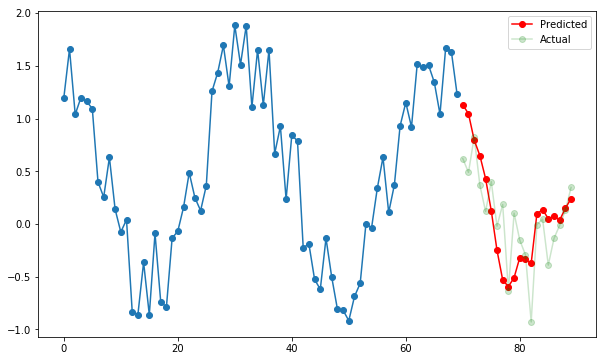

In [24]:
# 예측 결과 시각화
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(70,), 'o-')
plt.plot(b_axis, y_hat.reshape(20,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(20,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()


# RNN 연습해보기

In [367]:
import weather

ModuleNotFoundError: No module named 'weather'

In [366]:
weather.maybe_download_and_extract()

NameError: name 'weather' is not defined

## DATA 뜯어보기

In [58]:
import pandas as pd

In [59]:
pwd

'C:\\Data_analysis\\2019bigdata\\SVM_project'

In [60]:
sv = pd.read_csv('SDC_copy1_.csv')

In [61]:
sv.head()

,품명,도면번호,규격,재질/ MAKER,수량,단위,단가,금액,의뢰번호,비고,업체명,발주일,월,일,PROJECT N.O,PROJECT NAME,Unnamed: 16,Unnamed: 17
0,육각렌찌볼트,NaN,M3 * 6.0L,Ti,100,EA,"1,360","136,000",NaN,삼성 CELL PARTS 재고 확보,코파스,12월 28일,1.0,5.0,SJ15-0000,공용자재등,삼성 CELL PARTS 재고 확보,NaN
1,MAIN FLANGE,215-020-2100,NaN,NaN,2,EA,"150,000","300,000",NaN,삼성 CELL PARTS 재고 확보,모건 (킴스),12월 28일,1.0,4.0,SJ15-0000,공용자재등,삼성 CELL PARTS 재고 확보,NaN
2,MAIN FLANGE,215-028-2100,NaN,NaN,2,EA,"150,000","300,000",NaN,삼성 CELL PARTS 재고 확보,모건 (킴스),12월 28일,1.0,4.0,SJ15-0000,공용자재등,삼성 CELL PARTS 재고 확보,NaN
3,GASKET,NaN,"6""",NaN,50,EA,"6,500","325,000",NaN,삼성 CELL PARTS 재고 확보,아이산,NaN,1.0,8.0,SJ16-0000,공용자재등,삼성 CELL PARTS 재고 확보,NaN
4,TC,200-020-1500,NaN,NaN,10,EA,"100,000","1,000,000",NaN,삼성 CELL PARTS 재고 확보,센서아이티,12월 28일,1.0,8.0,SJ15-0000,공용자재등,삼성 CELL PARTS 재고 확보,NaN


In [7]:
sv.tail()

,품명,도면번호,규격,재질/ MAKER,수량,단위,단가,금액,의뢰번호,비고,업체명,발주일,월,일,PROJECT N.O,PROJECT NAME,Unnamed: 16,Unnamed: 17
3091,PBN 도가니,NaN,NaN,PBN,2,EA,"20,000","40,000",NaN,NaN,쎄미텍,05월 30일,5.0,30.0,201901-003,SDC 자재 관리를 위한 JOB,삼성디스플레이㈜,P201901-003-23
3092,쿨링코일,NaN,NaN,SUS,25,EA,"25,000","625,000",NaN,NaN,쎄미텍,05월 30일,5.0,30.0,201901-003,SDC 자재 관리를 위한 JOB,삼성디스플레이㈜,P201901-003-23
3093,T8 Strap Wide Type,917-028-0000,NaN,NaN,"1,000",EA,"5,300","5,300,000",NaN,NaN,쎄미텍,NaN,5.0,9.0,201901-003,SDC 자재 관리를 위한 JOB,삼성디스플레이㈜,P201901-003-23
3094,버핑-재생,NaN,NaN,NaN,38,EA,"1,500","57,000",NaN,NaN,윈윈테크,NaN,5.0,31.0,201903-066,Nozzle 수리건 100ea,삼성디스플레이㈜,P201903-066-02
3095,합 계,NaN,NaN,NaN,NaN,NaN,NaN,"4,785,716,499",NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sv.shape

(3096, 18)

In [72]:
sv[sv['품명'] == 'TC COVER']

,품명,도면번호,규격,재질/ MAKER,수량,단위,단가,금액,의뢰번호,비고,업체명,발주일,월,일,PROJECT N.O,PROJECT NAME,Unnamed: 16,Unnamed: 17
201,TC COVER,200-14-44-30600,NaN,NaN,100,EA,"15,000","1,500,000",NaN,삼성 CELL PARTS 재고 확보,신화테크,05월 12일,5.0,27.0,SJ16-3000,CELL PARTS 재고,삼성관련,NaN
424,TC COVER,NaN,216-020-2300,NaN,4,EA,"35,000","140,000",NaN,NaN,모건 (킴스),07월 15일,7.0,28.0,SJ16-3000,CELL PARTS 재고,SDC,NaN
435,TC COVER,200-14-44-30600,NaN,NaN,200,EA,"15,000","3,000,000",NaN,NaN,신화테크,06월 27일,7.0,11.0,SJ16-3000,CELL PARTS 재고,SDC,NaN
566,TC COVER,216-020-2300,NaN,NaN,84,EA,"17,000","1,428,000",NaN,NaN,신화테크,07월 26일,8.0,16.0,SJ16-0487,A2 Plate Type 신규 제작(40EA) 삼성디스플레이,SDC,NaN
597,TC COVER,200-14-44-30600,NaN,NaN,200,EA,"15,000","3,000,000",NaN,NaN,신화테크,09월 20일,9.0,30.0,SJ16-3000,CELL PARTS 재고,SDC,NaN
988,TC COVER,200-14-44-30600,NaN,NaN,200,EA,"14,000","2,800,000",.,NaN,신화테크,01월 18일,NaN,NaN,SJ17-3000,CELL PARTS 재고,SDC,NaN


In [62]:
len(sv['품명'].unique())

1379

In [63]:
len(sv['PROJECT N.O'].unique())

160

In [64]:
sv['PROJECT N.O'].unique()

array(['SJ15-0000', 'SJ16-0000', 'SJ16-0092', 'SJ16-0106', 'SJ16-0104',
       'SJ16-0103', 'SJ16-0167 ', 'SJ16-0075', 'SJ16-3000', 'SJ16-0232',
       'SJ16-0261 ', 'SJ16-0296', 'SJ16-0207 ', 'SJ16-0289 ', 'SJ16-0374',
       'SJ16-0354', 'SJ16-0444', 'SJ16-0313', 'SJ16-0436 ', 'SJ16-0487 ',
       'SJ16-0503', 'SJ16-0521', 'SJ16-0615', 'SJ16-0676 ', 'SJ16-0554',
       'SJ16-0710', 'SJ16-0762', 'SJ16-0773', 'SJ16-0786 ', 'SJ16-0758 ',
       'SJ16-0787 ', 'SJ16-0756', 'SJ16-0727', 'SJ16-0760', 'SJ17-3000',
       'SJ16-0798 ', 'SJ17-0003', 'SJ16-0799 ', 'SJ17-0006', 'SJ17-0038 ',
       'SJ17-0089 ', 'SJ17-0032', 'SJ17-0088', 'SJ17-0039', 'SJ17-0179',
       'SJ17-0188', 'SJ17-0189', 'SJ17-0120', 'SJ17-0193', 'SJ17-0203 ',
       'SJ17-0278 ', 'SJ17-0279', 'SJ17-0265', 'SJ17-0043', 'SJ17-0321',
       'SJ17-0217', 'SJ17-0289', 'SJ17-0266 ', 'SJ17-0347 ', 'SJ17-0239 ',
       'SJ17-0379 ', 'SJ17-0406 ', 'SJ17-0418 ', 'SJ17-0451', 'SJ17-0438',
       'SJ17-0437', 'SJ17-0381 ', 'SJ17-05

In [65]:
sv['Unnamed: 16'].unique()

## 11개

array(['삼성 CELL PARTS 재고 확보', '삼성 CELL PARTS ', '삼성관련', 'SDC', 'SDC ',
       'sdc', '삼성디스플레이', ' 삼성디스플레이', '삼성모바일디스플레이㈜', '삼성디스플레이㈜',
       '삼성디스플레이 ㈜', nan], dtype=object)

In [66]:
sv.tail()

,품명,도면번호,규격,재질/ MAKER,수량,단위,단가,금액,의뢰번호,비고,업체명,발주일,월,일,PROJECT N.O,PROJECT NAME,Unnamed: 16,Unnamed: 17
3091,PBN 도가니,NaN,NaN,PBN,2,EA,"20,000","40,000",NaN,NaN,쎄미텍,05월 30일,5.0,30.0,201901-003,SDC 자재 관리를 위한 JOB,삼성디스플레이㈜,P201901-003-23
3092,쿨링코일,NaN,NaN,SUS,25,EA,"25,000","625,000",NaN,NaN,쎄미텍,05월 30일,5.0,30.0,201901-003,SDC 자재 관리를 위한 JOB,삼성디스플레이㈜,P201901-003-23
3093,T8 Strap Wide Type,917-028-0000,NaN,NaN,"1,000",EA,"5,300","5,300,000",NaN,NaN,쎄미텍,NaN,5.0,9.0,201901-003,SDC 자재 관리를 위한 JOB,삼성디스플레이㈜,P201901-003-23
3094,버핑-재생,NaN,NaN,NaN,38,EA,"1,500","57,000",NaN,NaN,윈윈테크,NaN,5.0,31.0,201903-066,Nozzle 수리건 100ea,삼성디스플레이㈜,P201903-066-02
3095,합 계,NaN,NaN,NaN,NaN,NaN,NaN,"4,785,716,499",NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
print(sv['PROJECT N.O'].nunique())
print(sv['PROJECT NAME'].nunique())
print(sv['Unnamed: 16'].nunique())
print(sv['Unnamed: 17'].nunique())
print(sv['도면번호'].nunique())

159
154
11
206
819


In [68]:
sv['Unnamed: 16'].unique()

array(['삼성 CELL PARTS 재고 확보', '삼성 CELL PARTS ', '삼성관련', 'SDC', 'SDC ',
       'sdc', '삼성디스플레이', ' 삼성디스플레이', '삼성모바일디스플레이㈜', '삼성디스플레이㈜',
       '삼성디스플레이 ㈜', nan], dtype=object)

In [118]:
sv['PROJECT NAME'].unique()

array(['공용자재등', ' V1 MG Heater Repair 삼성디스플레이',
       ' CF Flange Single Heater Repair 件 ( A2-1 ) 삼성디스플레이',
       ' CF Flange Single Heater Repair 件 ( A1 ) 삼성디스플레이',
       ' CF Flange Dual Heater Repair 件 ( A2-2 ) 삼성디스플레이',
       'SJ16-0167  SDC A2 Tokki Bellows 삼성디스플레이',
       ' AMC Crucible Sample 제작 삼성디스플레이', ' CELL PARTS 재고',
       ' SDC V1 920cc W-Plate Type 개발 삼성디스플레이',
       'SDC A1 QCM 신규 제작 件 삼성디스플레이',
       ' SDC A2-1 Leak Test 장비 用 Bellows 제작 件 삼성디스플레이',
       '국책 과제_850cc Cell 개발 및 제작 중소기업청,삼성 디스플레이',
       'Source Safety Test 6차 진행 삼성디스플레이', ' QCM용 피두수루 용접 대흥정밀산업',
       ' SDC T8 Earth Plate_Wide,Normal 삼성디스플레이',
       ' High Temp Cell_AL 개조 진행 파트 가공건 x 4sets 티엠에스㈜',
       ' LW124681 SDC A1 Sheath Heater Repair 件 삼성디스플레이',
       'LW126443 SDC A2-1 550cc Plate Type Repair 件 ( 분리형 Repair 1건 추가 ) 삼성디스플레이',
       'A2 Plate Type 신규 제작(40EA) 삼성디스플레이',
       ' SDC A2 LoadUnload Bellows 삼성디스플레이',
       ' LW126935 SDC A1 Dual Cell Repair Ver B _Serial No 9 삼성디스플레이'

In [ ]:
sv['PROJECT N.O'].unique()

In [92]:
sv[sv['품명'] == 'HT INSULATOR A']

,품명,도면번호,규격,재질/ MAKER,수량,단위,단가,금액,의뢰번호,비고,업체명,발주일,월,일,PROJECT N.O,PROJECT NAME,Unnamed: 16,Unnamed: 17
6,HT INSULATOR A,215-020-1600,NaN,NaN,50,EA,"10,000","500,000",NaN,삼성 CELL PARTS 재고 확보,메스토,12월 28일,1.0,7.0,SJ15-0000,공용자재등,삼성 CELL PARTS 재고 확보,NaN
16,HT INSULATOR A,215-020-1600,NaN,NaN,200,EA,"7,000","1,400,000",NaN,삼성 CELL PARTS 재고 확보,메스토,01월 19일,1.0,22.0,SJ16-0000,공용자재등,삼성 CELL PARTS 재고 확보,NaN
134,HT INSULATOR A,215-020-1600,NaN,NaN,300,EA,"7,000","2,100,000",NaN,NaN,메스토,04월 29일,5.0,10.0,SJ16-3000,CELL PARTS 재고,삼성관련,NaN
155,HT INSULATOR A,215-033-1700,NaN,NaN,4,EA,"6,000","24,000",A3,NaN,메스토,04월 29일,5.0,15.0,SJ16-3000,CELL PARTS 재고,삼성관련,NaN
182,HT INSULATOR A,215-020-1600,NaN,NaN,100,EA,"7,000","700,000",NaN,삼성 CELL PARTS 재고 확보,메스토,05월 12일,5.0,26.0,SJ16-3000,CELL PARTS 재고,삼성관련,NaN
414,HT INSULATOR A,216-020-1600,NaN,NaN,2,EA,"25,000","50,000",NaN,NaN,메스토,07월 15일,7.0,20.0,SJ16-3000,CELL PARTS 재고,SDC,NaN
417,HT INSULATOR A,216-020-1600,NaN,bn,2,EA,"120,000","240,000",NaN,NaN,메스토,07월 15일,7.0,25.0,SJ16-3000,CELL PARTS 재고,SDC,NaN
502,HT INSULATOR A,NaN,216-020-1600,bn,2,EA,"110,000","220,000",NaN,NaN,메스토,NaN,8.0,1.0,SJ16-3000,CELL PARTS 재고,SDC,NaN
627,HT INSULATOR A,215-020-1600,NaN,NaN,200,EA,"7,000","1,400,000",NaN,NaN,메스토,09월 20일,10.0,7.0,SJ16-3000,CELL PARTS 재고,SDC,NaN
958,HT INSULATOR A,215-020-1600,NaN,NaN,200,EA,"6,000","1,200,000",.,NaN,메스토,01월 18일,2.0,2.0,SJ17-3000,CELL PARTS 재고,SDC,NaN


In [ ]:
사내가공
잔재사용

# TEST!! 

In [9]:
df = pd.read_csv('sv_test_.csv')
print(df.shape)
df.drop([0,1], inplace =True)
df.drop('No', axis=1 , inplace = True)
df.head()

(1046, 6)


,Line,고객 담당,품명,수주일,수량
2,A2-2,강예솔(님),Wire-일체형,2015-04-21,1.0
3,V1,이창용(님),Plate-분리형,2015-05-07,1.0
4,A2-2,강예솔(님),Wire-분리형,2015-06-22,1.0
5,A2-1,손재현(님),Single CF,2015-08-13,1.0
6,A2-1,손재현(님),Wire-일체형,2015-08-13,1.0


In [10]:
df.reset_index(inplace = True)
df.drop('index', axis=1 ,inplace=True)

In [11]:
df.isnull().sum()

# null값이 있는 행이 2건이므로 삭제하고 진행하도록한다. 
# 크게 영향을 미치지 않을거라 판단 1044 중 2건 -> 전체 데이터의 약 0.19%

Line     1
고객 담당    0
품명       1
수주일      1
수량       0
dtype: int64

In [12]:
df[df['Line'].isnull()]
df[df['수주일'].isnull()]

,Line,고객 담당,품명,수주일,수량
807,A3 F4,손은주(님),REV Wire Dual,NaN,1.0


In [13]:
df.drop([1041,807], inplace = True)
df.isnull().sum()

Line     0
고객 담당    0
품명       0
수주일      0
수량       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 0 to 1043
Data columns (total 5 columns):
Line     1042 non-null object
고객 담당    1042 non-null object
품명       1042 non-null object
수주일      1042 non-null object
수량       1042 non-null float64
dtypes: float64(1), object(4)
memory usage: 48.8+ KB


In [15]:
# data type 변경

df['수량'] = df['수량'].astype(int)
df['수주일'] = pd.to_datetime(df['수주일'], format = '%Y-%m-%d')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 0 to 1043
Data columns (total 5 columns):
Line     1042 non-null object
고객 담당    1042 non-null object
품명       1042 non-null object
수주일      1042 non-null datetime64[ns]
수량       1042 non-null int32
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 44.8+ KB


In [17]:
df.tail()

,Line,고객 담당,품명,수주일,수량
1038,A2,임범진,CF Flange Dual,2019-07-25,1
1039,A2,임범진,REV Wire 분리형 전환,2019-08-02,1
1040,A2,임범진,REV Wire 분리형,2019-08-02,1
1042,A1,임범진,REV Wire 일체형,2019-08-02,1
1043,A1,임범진,REV Wire 일체형,2019-08-02,1


## 좀 깔끔쓰 ~

고객 담당 컬럼을 없앤 dataframe = df1 

In [18]:
df1 = df.drop('고객 담당', axis=1)
df1.head()

,Line,품명,수주일,수량
0,A2-2,Wire-일체형,2015-04-21,1
1,V1,Plate-분리형,2015-05-07,1
2,A2-2,Wire-분리형,2015-06-22,1
3,A2-1,Single CF,2015-08-13,1
4,A2-1,Wire-일체형,2015-08-13,1


In [19]:
df2 = df1.copy()

In [20]:
df2.head()

,Line,품명,수주일,수량
0,A2-2,Wire-일체형,2015-04-21,1
1,V1,Plate-분리형,2015-05-07,1
2,A2-2,Wire-분리형,2015-06-22,1
3,A2-1,Single CF,2015-08-13,1
4,A2-1,Wire-일체형,2015-08-13,1


In [21]:
# 품목을 나누지 않고 일단 날짜별 수량으로 고장난거 예측해보기 

time_1 = df2.groupby(['수주일'])[['수량']].sum()
time_1.tail()

,수량
수주일,
2019-07-18,2
2019-07-22,2
2019-07-25,7
2019-07-29,1
2019-08-02,4


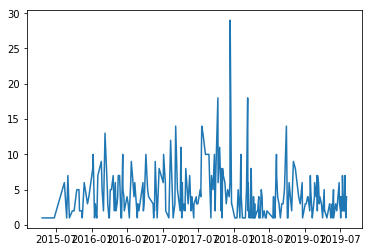

In [22]:
plt.plot(time_1)
plt.show()

In [23]:
print(time_1.max())
time_1[time_1['수량'] == 29]

수량    29
dtype: int32


,수량
수주일,
2017-12-12,29


In [24]:
time_1.shape

(249, 1)

In [26]:
time_data = pd.read_csv('time_data_1.csv')

In [25]:
## 기초 time_data 완성
## 이를 기반으로 주간, 월간, 분기간, 평균 등등 장난질쳐보기!

# time_data.to_csv('time_data.csv')

time_data = pd.read_csv('time_data.csv')
time_data.drop('Unnamed: 0', axis=1, inplace=True)
time_data.head()

FileNotFoundError: File b'time_data.csv' does not exist

In [27]:
time_data.shape

(1568, 3)

### LSTM_1_TEST의 문제점

수량이 들어온 날짜들의 일수는 총 249일

총 data 1564일중 249일만이 고장수량이 들어왔다. 

-> 전체 data의 약 16%만이 고장 수량이 들어왔다.

따라서 전체 data의 수를 줄이자 (주 또는 한달의 합계 수량으로 합친다음 진행)

## LSTM_1_TEST

In [23]:
## LSTM으로 TEST 해보기!

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

In [559]:
#LSTM의 개념인 window를 생성해줘야한다. 
# seq_len은 window size를 말한다.
# window size인 50일을 가지고 그 다음 1개를 만든다.
# 그래서 window를 만드는거는 50+1로 묶어서 진행한다.


seq_len = 730
sequence_length = seq_len + 14

# reslt의 리스트를 만들어 주고 여기에다가 window를 만들어준다. 
# 51개씩 차근차근 훑어주기 
result = []
for index in range(len(count) - sequence_length):
    result.append(count[index: index + sequence_length])

In [560]:
count = time_data['수량'].values
count.shape

(1564,)

In [561]:
result

[array([ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  7,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,
         0, 

In [539]:
# 정규화 nomaliztion 
# 첫번째 값을 첫번째 값을 기준으로 나누고 -1 하기
# ex) 두번째 data / 첫번째 data -1 
# 따라서 첫번째 data는 0으로 기준이 잡히게 된다.

normalized_data = []
for window in result:
    normalized_window = [((float(p)/float(window[0]))-1) for p in window]
    normalized_data.append(normalized_window)
    
# pass

ZeroDivisionError: float division by zero

In [562]:
result = np.array(result)

In [563]:
# 튜플 or np.array의 shape 알기  
# 보충해서 공부하기 

In [564]:
# split train and test data

row = int(round(result.shape[0]*0.9))
train = result[:row, :]

np.random.shuffle(train)

In [565]:
train.shape

(738, 744)

In [566]:
x_train = train[:,:-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[row:,:-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:,-1]

In [567]:
x_train.shape, x_test.shape

((738, 743, 1), (82, 743, 1))

In [568]:
# model 만들기

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (743,1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'rmsprop')
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 743, 50)           10400     
_________________________________________________________________
lstm_26 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# trainng 

model.fit(x_train, y_train, 
          validation_data = (x_test, y_test), batch_size =10, epochs=100)

Train on 738 samples, validate on 82 samples
Epoch 1/100
738/738 [==============================] - 43s 59ms/step - loss: 5.7731 - val_loss: 2.5681
Epoch 2/100
738/738 [==============================] - 44s 60ms/step - loss: 5.7123 - val_loss: 2.6418
Epoch 3/100
738/738 [==============================] - 44s 60ms/step - loss: 5.6951 - val_loss: 2.5549
Epoch 4/100
738/738 [==============================] - 45s 60ms/step - loss: 5.6870 - val_loss: 2.5489
Epoch 5/100
738/738 [==============================] - 45s 61ms/step - loss: 5.6361 - val_loss: 2.6859
Epoch 6/100
738/738 [==============================] - 44s 60ms/step - loss: 5.6786 - val_loss: 2.5232
Epoch 7/100
738/738 [==============================] - 45s 61ms/step - loss: 5.6500 - val_loss: 2.6054
Epoch 8/100
738/738 [==============================] - 45s 61ms/step - loss: 5.6667 - val_loss: 2.5918
Epoch 9/100
738/738 [==============================] - 45s 60ms/step - loss: 5.6465 - val_loss: 2.5332
Epoch 10/100
738/738 [======

In [ ]:
# prediction 

pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test, label = 'True')
ax.plot(pred, label = 'Prediction')
ax.legend()
plt.show()

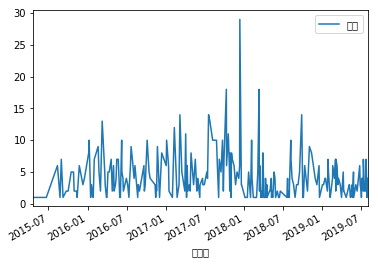

In [31]:
time_1.plot()
plt.show()

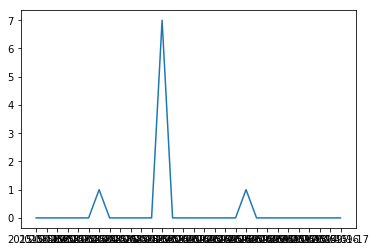

In [46]:
# time_data['수주일'].iloc[0:2].plot()
# plt.show()

plt.plot(time_data['수주일'].iloc[120:150], time_data['수량'].iloc[120:150])
plt.show()

## LSTM_TEST_2

In [48]:
time_test = time_data.copy()

In [51]:
time_test.set_index('수주일', inplace =True)
time_test.head()

,수량
수주일,
2015-04-21,1
2015-04-22,0
2015-04-23,0
2015-04-24,0
2015-04-25,0


In [63]:
time_month = pd.read_csv('time_month.csv')
print(time_month.shape)
time_month.info()

(53, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
date    53 non-null object
수량      53 non-null int64
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [64]:
time_month.head()

,date,수량
0,2019-04,1
1,2019-05,1
2,2019-06,1
3,2019-07,0
4,2019-08,14


In [66]:
time_month['date'] = pd.to_datetime(time_month['date'], format = '%Y-%m')

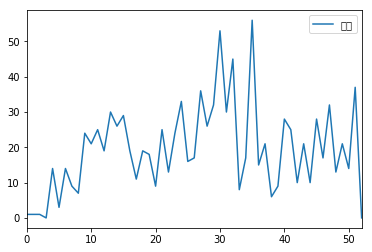

In [68]:
time_month.plot()
plt.show()

In [72]:
count = time_month['수량'].values
count.shape

(53,)

In [124]:
#LSTM의 개념인 window를 생성해줘야한다. 
# seq_len은 window size를 말한다.
# window size인 50일을 가지고 그 다음 1개를 만든다.
# 그래서 window를 만드는거는 50+1로 묶어서 진행한다.


seq_len = 3
sequence_length = seq_len + 1

# reslt의 리스트를 만들어 주고 여기에다가 window를 만들어준다. 
# 51개씩 차근차근 훑어주기 
result = []
for index in range(len(count) - sequence_length):
    result.append(count[index: index + sequence_length])

In [125]:
result = np.array(result)
# result

In [126]:
# split train and test data

row = int(round(result.shape[0]*0.8))
train = result[:row, :]

# np.random.shuffle(train)

In [127]:
## 전체는 53달 그중 train 달은 39달 

train.shape

(39, 4)

In [128]:
x_train = train[:,:-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[row:,:-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:,-1]

In [129]:
x_train.shape, x_test.shape

((39, 3, 1), (10, 3, 1))

In [130]:
# model 만들기

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (3,1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 3, 50)             10400     
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [141]:
# trainng 

model.fit(x_train, y_train, 
          validation_data = (x_test, y_test), batch_size =3, epochs=100)

Train on 39 samples, validate on 10 samples
Epoch 1/100
39/39 [==============================] - 0s 1ms/step - loss: 61.5356 - val_loss: 215.0467
Epoch 2/100
39/39 [==============================] - 0s 1ms/step - loss: 54.3297 - val_loss: 184.6121
Epoch 3/100
39/39 [==============================] - 0s 1ms/step - loss: 52.4939 - val_loss: 178.8623
Epoch 4/100
39/39 [==============================] - 0s 1ms/step - loss: 54.9349 - val_loss: 198.2515
Epoch 5/100
39/39 [==============================] - 0s 1ms/step - loss: 49.8544 - val_loss: 187.4842
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: 57.0740 - val_loss: 189.6873
Epoch 7/100
39/39 [==============================] - 0s 1ms/step - loss: 50.7944 - val_loss: 200.1136
Epoch 8/100
39/39 [==============================] - 0s 1ms/step - loss: 51.7501 - val_loss: 192.5888
Epoch 9/100
39/39 [==============================] - 0s 1ms/step - loss: 45.9650 - val_loss: 188.6845
Epoch 10/100
39/39 [==================

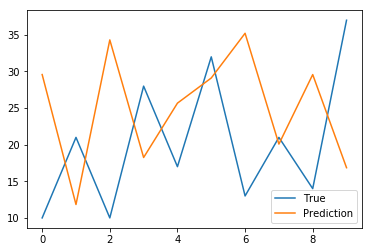

In [142]:
# prediction 

pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test, label = 'True')
ax.plot(pred, label = 'Prediction')
ax.legend()
plt.show()

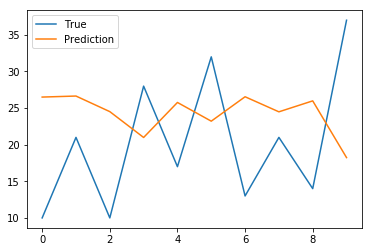

In [123]:
# prediction 

pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test, label = 'True')
ax.plot(pred, label = 'Prediction')
ax.legend()
plt.show()

## time_weeks/ LSTM_TEST_3

In [5]:
time_weeks = pd.read_csv('time_weeks.csv')
print(time_weeks.shape)
time_weeks.info()

(1568, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 9 columns):
Unnamed: 0    1568 non-null int64
수주일           1568 non-null object
수량            1568 non-null int64
Unnamed: 3    0 non-null float64
Unnamed: 4    0 non-null float64
주             224 non-null float64
Unnamed: 6    224 non-null object
Unnamed: 7    224 non-null float64
Unnamed: 8    0 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 110.3+ KB


In [6]:
time_weeks.head()

,Unnamed: 0,수주일,수량,Unnamed: 3,Unnamed: 4,주,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0,2015-04-18,0,NaN,NaN,1.0,2015-04-18,1.0,NaN
1,1,2015-04-19,0,NaN,NaN,2.0,2015-04-25,0.0,NaN
2,2,2015-04-20,0,NaN,NaN,3.0,2015-05-02,1.0,NaN
3,3,2015-04-21,1,NaN,NaN,4.0,2015-05-09,0.0,NaN
4,4,2015-04-22,0,NaN,NaN,5.0,2015-05-16,0.0,NaN


In [7]:
time_weeks.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 4','수주일','수량','Unnamed: 8'], axis=1 ,inplace =True)
# time_weeks['주차'] = pd.to_datetime(time_weeks['주차'], format = '%Y-%m-%d')
time_weeks.head()

,주,Unnamed: 6,Unnamed: 7
0,1.0,2015-04-18,1.0
1,2.0,2015-04-25,0.0
2,3.0,2015-05-02,1.0
3,4.0,2015-05-09,0.0
4,5.0,2015-05-16,0.0


In [8]:
time_weeks.rename(columns = {'Unnamed: 6':'일자','Unnamed: 7':'수량'}, inplace = True)

In [9]:
time_weeks.set_index('일자', inplace =True)
time_weeks.head()

,주,수량
일자,,
2015-04-18,1.0,1.0
2015-04-25,2.0,0.0
2015-05-02,3.0,1.0
2015-05-09,4.0,0.0
2015-05-16,5.0,0.0


In [10]:
time_weeks.isnull().sum()

주     1344
수량    1344
dtype: int64

In [11]:
time_weeks.dropna(inplace =True)

In [12]:
time_weeks['주'] = time_weeks['주'].astype(int)
time_weeks['수량'] = time_weeks['수량'].astype(int)

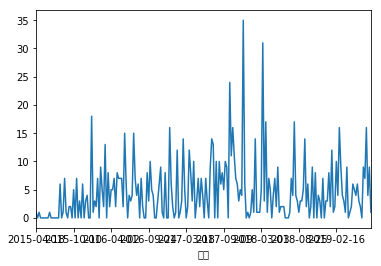

In [13]:
time_weeks['수량'].plot()
plt.show()

In [14]:
time_weeks.to_csv('time_weeks_1.csv')

In [15]:
count = time_weeks['수량'].values
count.shape

(224,)

In [16]:
#LSTM의 개념인 window를 생성해줘야한다. 
# seq_len은 window size를 말한다.
# window size인 50일을 가지고 그 다음 1개를 만든다.
# 그래서 window를 만드는거는 50+1로 묶어서 진행한다.


seq_len = 6
sequence_length = seq_len + 2

# reslt의 리스트를 만들어 주고 여기에다가 window를 만들어준다. 
# 51개씩 차근차근 훑어주기 
result = []
for index in range(len(count) - sequence_length):
    result.append(count[index: index + sequence_length])

In [17]:
result = np.array(result)
# result

In [18]:
# split train and test data

row = int(round(result.shape[0]*0.8))
train = result[:row, :]

# np.random.shuffle(train)

In [19]:
## 전체는 53달 그중 train 달은 39달 

train.shape

(173, 8)

In [20]:
x_train = train[:,:-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[row:,:-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:,-1]

In [21]:
x_train.shape, x_test.shape

((173, 7, 1), (43, 7, 1))

In [53]:
# model 만들기

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (7,1)))
model.add(LSTM(24, return_sequences = False))

model.add(Dense(1, activation = 'linear'))
model.add(Dropout(0.3))
model.compile(loss = 'mse', optimizer = 'rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 7, 128)            66560     
_________________________________________________________________
lstm_19 (LSTM)               (None, 24)                14688     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 25        
_________________________________________________________________
dropout_8 (Dropout)          (None, 1)                 0         
Total params: 81,273
Trainable params: 81,273
Non-trainable params: 0
_________________________________________________________________


In [63]:
# trainng 

model.fit(x_train, y_train, 
          validation_data = (x_test, y_test), batch_size =7, epochs=150)

Train on 173 samples, validate on 43 samples
Epoch 1/150
173/173 [==============================] - 0s 1ms/step - loss: 13.7123 - val_loss: 21.4469
Epoch 2/150
173/173 [==============================] - 0s 1ms/step - loss: 19.7535 - val_loss: 19.9274
Epoch 3/150
173/173 [==============================] - 0s 1ms/step - loss: 23.4808 - val_loss: 19.7673
Epoch 4/150
173/173 [==============================] - 0s 1ms/step - loss: 8.0711 - val_loss: 20.4336
Epoch 5/150
173/173 [==============================] - 0s 1ms/step - loss: 18.2142 - val_loss: 21.6795
Epoch 6/150
173/173 [==============================] - 0s 1ms/step - loss: 17.9860 - val_loss: 20.4461
Epoch 7/150
173/173 [==============================] - 0s 1ms/step - loss: 20.2542 - val_loss: 21.8914
Epoch 8/150
173/173 [==============================] - 0s 1ms/step - loss: 10.4771 - val_loss: 19.8187
Epoch 9/150
173/173 [==============================] - 0s 1ms/step - loss: 21.9017 - val_loss: 20.1366
Epoch 10/150
173/173 [=======

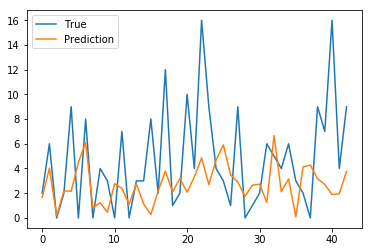

In [64]:
# prediction 

pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test, label = 'True')
ax.plot(pred, label = 'Prediction')
ax.legend()
plt.show()

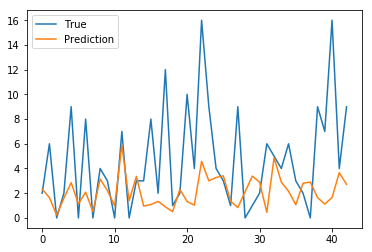

In [29]:
# prediction 

pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test, label = 'True')
ax.plot(pred, label = 'Prediction')
ax.legend()
plt.show()

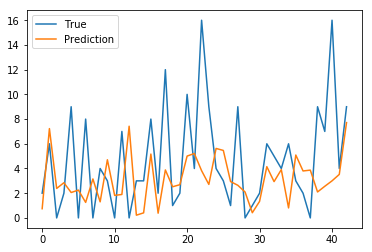

In [ ]:
# prediction 

pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test, label = 'True')
ax.plot(pred, label = 'Prediction')
ax.legend()
plt.show()

## 상태유지스택순환신경망델

In [296]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [297]:
# look_back 이전 시점의 데이터를 얼마나 사용할 것인가?
# lstm의 window와 같은 개념으로 이해하자


def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [285]:
## keras.callbacks.coallback
## loss 값 및 val_loss 
## 이 부분은 조금 더 공부를 해야할 필요가 있다.

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

In [298]:
look_back = 6

In [299]:
# 1. 데이터셋 생성하기

# signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]
count = time_weeks['수량'].values
count = count.reshape(-1,1)

In [273]:
# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
count = scaler.fit_transform(count)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [300]:
# 데이터 분리

train = count[0:173]
# val = signal_data[800:1200]
test = signal_data[174:]


In [301]:
# 데이터셋 생성

x_train, y_train = create_dataset(train, look_back)
# x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)



In [302]:
# 데이터셋 전처리

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [303]:
# 2. 모델 구성하기
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')


In [304]:
# 4. 모델 학습시키기

custom_hist = CustomHistory()
custom_hist.init()

for i in range(200):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist])
    model.reset_states()

Epoch 1/1
167/167 [==============================] - 8s 47ms/step - loss: 32.4039
Epoch 1/1
167/167 [==============================] - 1s 7ms/step - loss: 31.5024
Epoch 1/1
167/167 [==============================] - 1s 7ms/step - loss: 31.3684
Epoch 1/1
167/167 [==============================] - 1s 7ms/step - loss: 30.2042
Epoch 1/1
167/167 [==============================] - 1s 7ms/step - loss: 30.6962
Epoch 1/1
167/167 [==============================] - 1s 7ms/step - loss: 31.2533
Epoch 1/1
167/167 [==============================] - 1s 7ms/step - loss: 30.7034
Epoch 1/1
167/167 [==============================] - 1s 7ms/step - loss: 31.0024
Epoch 1/1
167/167 [==============================] - 1s 7ms/step - loss: 30.6049
Epoch 1/1
167/167 [==============================] - 1s 7ms/step - loss: 30.7163
Epoch 1/1
167/167 [==============================] - 1s 7ms/step - loss: 29.9037
Epoch 1/1
167/167 [==============================] - 1s 7ms/step - loss: 30.7856
Epoch 1/1
167/167 [========

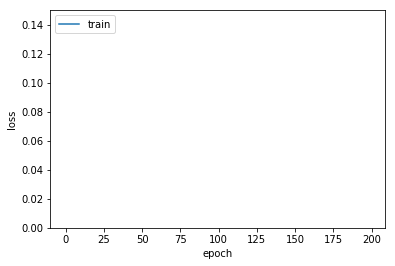

In [305]:
# 5. 학습과정 살펴보기

plt.plot(custom_hist.train_loss)
# plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [306]:
# 6. 모델 평가하기

trainScore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)

# valScore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
# # model.reset_states()
# print('Validataion Score: ', valScore)

testScore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('Test Score: ', testScore)


Train Score:  9.869692601985543
Test Score:  2.404083458346428


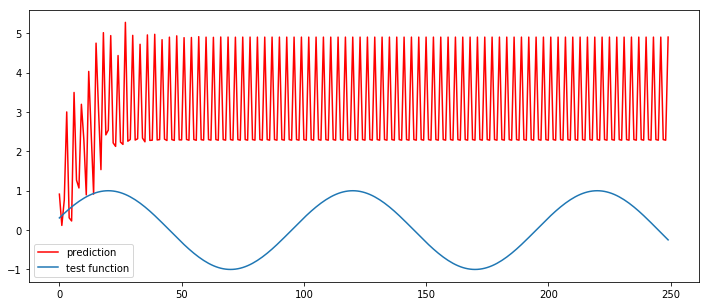

In [307]:
# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))

for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

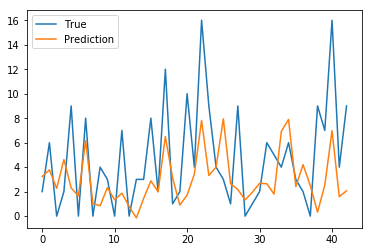

In [232]:
# prediction 

pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test, label = 'True')
ax.plot(pred, label = 'Prediction')
ax.legend()
plt.show()

In [308]:
# look_back = 40
#  model.add(LSTM(32, batch_input_shape = (1, look_back, 1),
# stateful = True, return_sequences=True)

model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

## 고통의 연속 결과를 만들어내자!! 

In [312]:
time_weeks.head()

,주,수량
일자,,
2015-04-18,1,1
2015-04-25,2,0
2015-05-02,3,1
2015-05-09,4,0
2015-05-16,5,0


In [314]:
time_weeks['요일'] = time_weeks.index.get_level_values(1).dayofweek
time_weeks['월'] = time_weeks.index.get_level_values(1).month
time_weeks['일'] = time_weeks.index.get_level_values(1).day

IndexError: Too many levels: Index has only 1 level, not 2

In [41]:
time_weeks.head()

,주,수량
일자,,
2015-04-18,1,1
2015-04-25,2,0
2015-05-02,3,1
2015-05-09,4,0
2015-05-16,5,0


In [46]:
count

array([ 1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  6,
        0,  1,  7,  1,  0,  2,  2,  0,  5,  0,  7,  0,  3,  0,  6,  0,  3,
        4,  0,  0, 18,  1,  3,  2,  7,  0,  9,  5,  2, 13,  0,  8,  2,  5,
        5,  7,  2,  8,  7,  7,  7,  2, 15,  6,  0,  4,  3,  4, 15,  7,  4,
        6,  0,  7,  2,  0,  0,  8,  3, 10,  5,  4,  0,  0,  3,  6,  9,  1,
        0,  8,  0,  0, 16,  6,  2,  0,  1, 12,  0,  1,  3, 14,  5,  0,  2,
       12,  8,  3, 10,  0,  3,  7,  2,  7,  4,  0,  7,  3,  0,  9, 14, 13,
        0, 10,  0, 10,  6,  8,  5, 10,  9,  0, 24, 11, 16, 11,  7,  6,  3,
        5,  4, 35,  6,  0,  1,  0,  1,  5,  1, 14,  1,  1,  1,  5, 31,  3,
       17,  1,  7,  5,  0,  4,  7,  2,  9,  1,  2,  2,  2,  0,  0,  0,  1,
        7,  4, 17,  4,  3,  1,  3,  3,  5, 14,  2,  6,  0,  2,  9,  0,  8,
        0,  4,  3,  0,  7,  0,  3,  3,  8,  2, 12,  1,  2, 10,  4, 16,  9,
        4,  3,  1,  9,  0,  1,  2,  6,  5,  4,  6,  3,  2,  0,  9,  7, 16,
        4,  9,  1])

## 08.19일 시작해보자!! 

In [98]:
time_data = pd.read_csv('time_data_1.csv')
time_data.drop('Unnamed: 0', axis=1, inplace = True)
time_data.head()

,수주일,수량
0,2015-04-18,0
1,2015-04-19,0
2,2015-04-20,0
3,2015-04-21,1
4,2015-04-22,0


In [101]:
time_data['수주일'] = pd.to_datetime(time_data['수주일'], format = '%Y-%m-%d')
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 2 columns):
수주일    1568 non-null datetime64[ns]
수량     1568 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.6 KB


In [103]:
## time_data_1 에 index를 수주일로 설정하고 시작

time_data_1 = time_data.set_index(['수주일'])
time_data_1.head()

,수량
수주일,
2015-04-18,0
2015-04-19,0
2015-04-20,0
2015-04-21,1
2015-04-22,0


In [104]:
time_data_1['요일'] = time_data_1.index.dayofweek
time_data_1['월'] = time_data_1.index.month
time_data_1['일'] = time_data_1.index.day
time_data_1.head()

,수량,요일,월,일
수주일,,,,
2015-04-18,0,5,4,18
2015-04-19,0,6,4,19
2015-04-20,0,0,4,20
2015-04-21,1,1,4,21
2015-04-22,0,2,4,22


In [114]:
time_data_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1568 entries, 2015-04-18 to 2019-08-02
Data columns (total 10 columns):
수량      1568 non-null int64
월       1568 non-null int64
일       1568 non-null int64
요일_0    1568 non-null uint8
요일_1    1568 non-null uint8
요일_2    1568 non-null uint8
요일_3    1568 non-null uint8
요일_4    1568 non-null uint8
요일_5    1568 non-null uint8
요일_6    1568 non-null uint8
dtypes: int64(3), uint8(7)
memory usage: 59.7 KB


In [115]:
time_data_1.head()

,수량,월,일,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
수주일,,,,,,,,,,
2015-04-18,0,4,18,0,0,0,0,0,1,0
2015-04-19,0,4,19,0,0,0,0,0,0,1
2015-04-20,0,4,20,1,0,0,0,0,0,0
2015-04-21,1,4,21,0,1,0,0,0,0,0
2015-04-22,0,4,22,0,0,1,0,0,0,0


In [ ]:
asdasd asdasㅇㅁㄴㅇㅁㄴㅇasdasd[]

In [117]:
len(time_data_1[time_data_1['수량'] >= 1 ])

248

In [121]:
len(time_data_1['수량'])

1568

In [123]:
248/1568 * 100 
## 15% ???? 

15.816326530612246

In [139]:
tt = pd.read_csv('공휴일.csv', engine = 'python', header = None)
tt.head()

,0,1
0,癤�2015-01-01,0
1,2015-02-18,0
2,2015-02-19,0
3,2015-02-20,0
4,2015-03-01,0


In [144]:
time_data_1.to_csv('time_data_2.csv')

In [146]:
## 요일_5는 토요일
## 요일_6은 일요일

time_data_1.tail(10)

,수량,월,일,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
수주일,,,,,,,,,,
2019-07-24,0,7,24,0,0,1,0,0,0,0
2019-07-25,7,7,25,0,0,0,1,0,0,0
2019-07-26,0,7,26,0,0,0,0,1,0,0
2019-07-27,0,7,27,0,0,0,0,0,1,0
2019-07-28,0,7,28,0,0,0,0,0,0,1
2019-07-29,1,7,29,1,0,0,0,0,0,0
2019-07-30,0,7,30,0,1,0,0,0,0,0
2019-07-31,0,7,31,0,0,1,0,0,0,0
2019-08-01,0,8,1,0,0,0,1,0,0,0


In [158]:
요일_6 = time_data_1[time_data_1['요일_6'] == 1]

In [160]:
## 총 데이터 건수 248개 에서 2건을 수량에서 제외 하는 것 고려하기

요일_6[요일_6['수량'] >= 1]

,수량,월,일,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
수주일,,,,,,,,,,
2016-05-01,6,5,1,0,0,0,0,0,0,1
2017-01-15,2,1,15,0,0,0,0,0,0,1


In [161]:
요일_5 = time_data_1[time_data_1['요일_5'] == 1]

In [162]:
요일_5[요일_5['수량'] >= 1]

,수량,월,일,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
수주일,,,,,,,,,,


In [164]:
## 공휴일 추가한 df time_data_2

time_data_2 = pd.read_csv('time_data_2.csv')
time_data_2.head()

,수주일,수량,월,일,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,공휴일
0,2015-04-18,0,4,18,0,0,0,0,0,1,0,0.0
1,2015-04-19,0,4,19,0,0,0,0,0,0,1,0.0
2,2015-04-20,0,4,20,1,0,0,0,0,0,0,0.0
3,2015-04-21,1,4,21,0,1,0,0,0,0,0,NaN
4,2015-04-22,0,4,22,0,0,1,0,0,0,0,NaN


In [168]:
time_data_2.fillna(0, inplace =True)
time_data_2.head()

,수주일,수량,월,일,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,공휴일
0,2015-04-18,0,4,18,0,0,0,0,0,1,0,0.0
1,2015-04-19,0,4,19,0,0,0,0,0,0,1,0.0
2,2015-04-20,0,4,20,1,0,0,0,0,0,0,0.0
3,2015-04-21,1,4,21,0,1,0,0,0,0,0,0.0
4,2015-04-22,0,4,22,0,0,1,0,0,0,0,0.0


In [165]:
time_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 12 columns):
수주일     1568 non-null object
수량      1568 non-null int64
월       1568 non-null int64
일       1568 non-null int64
요일_0    1568 non-null int64
요일_1    1568 non-null int64
요일_2    1568 non-null int64
요일_3    1568 non-null int64
요일_4    1568 non-null int64
요일_5    1568 non-null int64
요일_6    1568 non-null int64
공휴일     76 non-null float64
dtypes: float64(1), int64(10), object(1)
memory usage: 147.1+ KB


In [170]:
time_data_2['수주일'] = pd.to_datetime(time_data_2['수주일'], format = '%Y-%m-%d')
time_data_2['공휴일'] = time_data_2['공휴일'].astype(int)

In [174]:
tt = time_data_2[time_data_2['요일_6'] == 1 ]

In [176]:
## 토요일에 수주일 들어온 특이케이스 데이터 삭제하고 진행하도록 한다. 
## 379, 638 

time_data_3 = time_data_2.drop([379,638])

In [181]:
# index를 수주일로 맞춰수고 시작한다.

time_data_4 = time_data_3.set_index('수주일')

In [183]:
## 모델을 만들고 한번 fitting 까지 해보도록한다. 


In [195]:
time_data_4.head(1)

,수량,월,일,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,공휴일
수주일,,,,,,,,,,,
2015-04-18,0,4,18,0,0,0,0,0,1,0,0


In [187]:
time_data_4.shape

(1566, 11)

In [190]:
count = time_data_4['수량'].values
count.shape

(1566,)

In [191]:
#LSTM의 개념인 window를 생성해줘야한다. 
# seq_len은 window size를 말한다.
# window size인 50일을 가지고 그 다음 1개를 만든다.
# 그래서 window를 만드는거는 50+1로 묶어서 진행한다.


seq_len = 14
sequence_length = seq_len + 7

# reslt의 리스트를 만들어 주고 여기에다가 window를 만들어준다. 
# 51개씩 차근차근 훑어주기 
result = []
for index in range(len(count) - sequence_length):
    result.append(count[index: index + sequence_length])

In [192]:
result = np.array(result)
# result

In [193]:
# split train and test data

row = int(round(result.shape[0]*0.8))
train = result[:row, :]

# np.random.shuffle(train)

In [194]:
## 전체는 53달 그중 train 달은 39달 

train.shape

(1236, 21)

In [196]:
x_train = train[:,:-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[row:,:-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = result[row:,-1]

In [197]:
x_train.shape, x_test.shape

((1236, 20, 1), (309, 20, 1))

In [201]:
# model 만들기

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (20,1)))
model.add(LSTM(64, return_sequences = False))

model.add(Dense(1, activation = 'linear'))
model.add(Dropout(0.3))
model.compile(loss = 'mse', optimizer = 'rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20, 128)           66560     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [202]:
# trainng 

model.fit(x_train, y_train, 
          validation_data = (x_test, y_test), batch_size =10, epochs=50)

Train on 1236 samples, validate on 309 samples
Epoch 1/50
1236/1236 [==============================] - 3s 3ms/step - loss: 4.8898 - val_loss: 3.2370
Epoch 2/50
1236/1236 [==============================] - 2s 2ms/step - loss: 4.8110 - val_loss: 3.2885
Epoch 3/50
1236/1236 [==============================] - 2s 2ms/step - loss: 4.8754 - val_loss: 3.3380
Epoch 4/50
1236/1236 [==============================] - 2s 2ms/step - loss: 4.7911 - val_loss: 3.2458
Epoch 5/50
1236/1236 [==============================] - 2s 2ms/step - loss: 4.8350 - val_loss: 3.3186
Epoch 6/50
1236/1236 [==============================] - 2s 2ms/step - loss: 4.7969 - val_loss: 3.2730
Epoch 7/50
1236/1236 [==============================] - 2s 2ms/step - loss: 4.7885 - val_loss: 3.2308
Epoch 8/50
1236/1236 [==============================] - 2s 2ms/step - loss: 4.8218 - val_loss: 3.3221
Epoch 9/50
1236/1236 [==============================] - 2s 2ms/step - loss: 4.8373 - val_loss: 3.2664
Epoch 10/50
1236/1236 [============

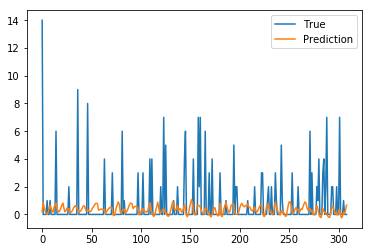

In [203]:
# prediction 

pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(y_test, label = 'True')
ax.plot(pred, label = 'Prediction')
ax.legend()
plt.show()

In [206]:
time_data_4.to_csv('time_data_4.csv')

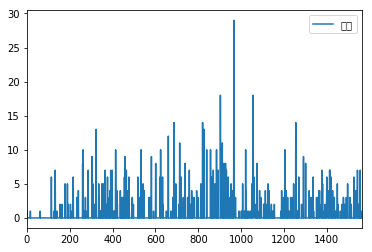

In [144]:
time_data.plot()
plt.show()

In [293]:
import calendar

print(calendar.calendar(2015))

                                  2015

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
          1  2  3  4                         1                         1
 5  6  7  8  9 10 11       2  3  4  5  6  7  8       2  3  4  5  6  7  8
12 13 14 15 16 17 18       9 10 11 12 13 14 15       9 10 11 12 13 14 15
19 20 21 22 23 24 25      16 17 18 19 20 21 22      16 17 18 19 20 21 22
26 27 28 29 30 31         23 24 25 26 27 28         23 24 25 26 27 28 29
                                                    30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
       1  2  3  4  5                   1  2  3       1  2  3  4  5  6  7
 6  7  8  9 10 11 12       4  5  6  7  8  9 10       8  9 10 11 12 13 14
13 14 15 16 17 18 19      11 12 13 14 15 16 17      15 16 17 18 19 20 21
20 21 22 23 24 25 26      18 19 20 21 22 

In [154]:
1568/7

224.0

In [ ]:
47 54 61 68

In [ ]:
1564

In [155]:
tt = pd.read_csv('time_data.csv')

In [159]:
from pandas import Series, DataFrame

tt = DataFrame(tt)

In [161]:
tt.drop('Unnamed: 0', axis=1, inplace=True)

In [162]:
tt.head()

,수주일,수량
0,2015-04-18,0
1,2015-04-19,0
2,2015-04-20,0
3,2015-04-21,1
4,2015-04-22,0


In [163]:
t1 = tt.set_index('수주일')
t1.head()

,수량
수주일,
2015-04-18,0
2015-04-19,0
2015-04-20,0
2015-04-21,1
2015-04-22,0


In [ ]:
tq1

In [176]:
t1[t1['수량'] >= 10]

,수량
수주일,
2016-01-08,10
2016-03-09,13
2016-06-08,10
2016-10-05,10
2017-01-04,10
2017-02-09,12
2017-03-07,14
2017-04-03,11
2017-07-19,14


In [165]:
df2

,Line,품명,수주일,수량
0,A2-2,Wire-일체형,2015-04-21,1
1,V1,Plate-분리형,2015-05-07,1
2,A2-2,Wire-분리형,2015-06-22,1
3,A2-1,Single CF,2015-08-13,1
4,A2-1,Wire-일체형,2015-08-13,1
5,A2-1,Wire-일체형,2015-08-13,1
6,A2-1,Single CF,2015-08-13,1
7,A2-1,Wire-일체형,2015-08-13,1
8,A2-1,Wire-일체형,2015-08-13,1
9,A2-2,Dual CF,2015-08-25,1


In [167]:
cell = pd.read_csv('cell_repair_.csv')
cell.head()

,No,Line,품명,수량,수주일,완료 (확정일),진행 확인,Serial No,단가,내용설명,수리시간,사용기간,Unnamed: 12
0,97.0,A2,A2 CF 듀얼,1.0,2019-04-12,2019-04-24,완료,S2180108D,"8,942,000",Source 유입,12.0,225.0,NaN
1,190.0,A2,A2 CF 듀얼,1.0,2018-08-07,2018-08-30,완료,S2180108D,"8,942,000",Source 유입,23.0,90.0,NaN
2,145.0,A2,A2 CF 듀얼,1.0,2018-04-17,2018-05-09,완료,S2180108D,"8,942,000",Source 유입,22.0,NaN,NaN
3,167.0,A2,A2 Rev 분리형,1.0,2019-07-25,2019-07-30,완료,S21801040,"7,234,700",Heater / Reflector 파손,5.0,NaN,NaN
4,217.0,A2,A2 CF 싱글,1.0,2018-09-03,2018-09-17,완료,S2180102S,"8,518,900",Source 유입,14.0,NaN,NaN


In [168]:
cell['Serial No'].nunique()

693

In [170]:
cell.shape

(987, 13)

In [181]:
cell.groupby('품명 ')[['수량']].sum()

,수량
품명,
A1 CF 싱글,29.0
A1 CF 싱글,1.0
A1 Rev 일체형,42.0
A2 CF 듀얼,129.0
A2 CF 싱글,102.0
A2 Rev 분리형,140.0
A2 Rev 분리형,14.0
A2 Rev 일체형,290.0
A3 Rev 듀얼,221.0


In [190]:
ww = cell.groupby(['수주일','품명 '])[['수량']].sum()
ww.head()

수량
수주일        품명             
2015-04-21 A2 Rev 일체형  1.0
2015-06-22 A2 Rev 분리형  1.0
2015-08-13 A2 CF 싱글    2.0
           A2 Rev 일체형  4.0
2015-08-25 A2 CF 듀얼    1.0

In [196]:
ww = cell[cell['품명 '] == 'A2 Rev 일체형']
ww.sort_values('수주일', inplace =True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [198]:
ww.tail()

,No,Line,품명,수량,수주일,완료 (확정일),진행 확인,Serial No,단가,내용설명,수리시간,사용기간,Unnamed: 12
308,336.0,A2,A2 Rev 일체형,1.0,2017-12-11,2017-12-29,완료,A13163R,"11,369,740",Source 유입,18.0,NaN,NaN
527,337.0,A2,A2 Rev 일체형,1.0,2017-12-11,2017-12-29,완료,1207030,"11,369,740",Source 유입,18.0,NaN,NaN
572,343.0,A2,A2 Rev 일체형,1.0,2017-12-19,2018-01-09,완료,1107270,"11,369,740",Source 유입,21.0,NaN,NaN
345,344.0,A2,A2 Rev 일체형,1.0,2017-12-19,2018-01-09,완료,A13128R,"11,369,740",Source 유입,21.0,649.0,NaN
691,345.0,A2,A2 Rev 일체형,1.0,2017-12-19,2018-01-09,완료,110615,"11,369,740",Source 유입,21.0,NaN,NaN


In [202]:
ww.shape

(290, 13)

In [201]:
ee = cell[cell['품명 '] == 'A3 Rev 듀얼	221.0']
ee.sort_values('수주일', inplace =True)
ee.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,No,Line,품명,수량,수주일,완료 (확정일),진행 확인,Serial No,단가,내용설명,수리시간,사용기간,Unnamed: 12
444,3.0,A2-2,A2 Rev 분리형,1.0,2015-06-22,2015-07-24,완료,A13047R,"9,624,500",Heater 파손,32.0,NaN,NaN
751,73.0,A2-1,A2 Rev 분리형,1.0,2016-04-05,2016-04-20,완료,110455,0,Warranty IN,15.0,NaN,NaN
579,78.0,A2-1,A2 Rev 분리형,1.0,2016-04-11,2016-05-10,완료,1107247,"5,400,000",초기 재료샘이었으나 반출 시 제거된 것으로 확인,29.0,NaN,NaN
621,85.0,A2-1,A2 Rev 분리형,1.0,2016-04-20,2016-05-12,완료,1107118,0,Warranty IN,22.0,NaN,NaN
605,92.0,A2-1,A2 Rev 분리형,1.0,2016-05-01,2016-05-23,완료,1107154,"8,360,000",Source 유입,22.0,NaN,NaN


In [203]:
ee.shape

(140, 13)

In [208]:
aa = cell[cell['품명 '] == 'A3 Rev 듀얼']
aa.sort_values('수주일', inplace =True)
aa.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,No,Line,품명,수량,수주일,완료 (확정일),진행 확인,Serial No,단가,내용설명,수리시간,사용기간,Unnamed: 12
34,155.0,A3 F4,A3 Rev 듀얼,1.0,2019-07-12,2019-07-26,완료,A16857DA,"8,858,100",Heater / Reflector 파손,14.0,NaN,NaN
65,154.0,A3 F4,A3 Rev 듀얼,1.0,2019-07-12,2019-07-26,완료,A16512DA,"8,858,100",Heater / Reflector 파손,14.0,NaN,NaN
30,156.0,A3 F4,A3 Rev 듀얼,1.0,2019-07-12,2019-07-26,완료,A16968DA,"9,245,400",Source 유입,14.0,NaN,NaN
59,169.0,A3 F4,A3 Rev 듀얼,1.0,2019-07-25,2019-08-15,완료,A16566DA,"9,245,400",Source 유입,21.0,NaN,NaN
18,168.0,A3 F4,A3 Rev 듀얼,1.0,2019-07-25,2019-08-15,완료,A17449DA,0,Warranty IN,21.0,NaN,NaN


In [209]:
aa.shape

(221, 13)